In [5]:
# Librerías esenciales para análisis de datos
import pandas as pd
import numpy as np

# Preprocesamiento y escalado
from sklearn.preprocessing import StandardScaler

# Reducción de dimensionalidad para visualización
from sklearn.decomposition import PCA

# 🤖 Clustering
from sklearn.cluster import KMeans

# 🧪 Evaluación de agrupamiento
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Estilo visual de los gráficos
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder

In [6]:
import pandas as pd

music_info = pd.read_csv("MusicInfo.csv")
#listening_df = pd.read_csv(r"C:\Users\VICTUS hp\Desktop\ING. CIENCIAS DE LA COMPUTACION\5. QUINTO SEMESTRE\INTELIGENCIA ARTIFICIAL\LABORATORIOS\Laboratorio5\Dataset\User Listening History.csv")

label_encoder = LabelEncoder()
music_info['artist_encoded'] = label_encoder.fit_transform(music_info['artist'])

#features = ['track_id', 'artist_encoded', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
 #   'mode', 'speechiness', 'acousticness', 'instrumentalness',
  #  'liveness', 'valence', 'tempo', 'time_signature'
   # ]

features = [
    'key', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 
    'tempo', 'year', 'time_signature', 'artist_encoded', 'mode',
]

music_feautures = music_info[features]

print(music_feautures.head())

   key  energy  loudness  speechiness  acousticness  instrumentalness  \
0    1   0.918    -4.360       0.0746      0.001190          0.000000   
1    2   0.892    -4.373       0.0336      0.000807          0.000000   
2    4   0.826    -5.783       0.0400      0.000175          0.000459   
3    9   0.664    -8.851       0.0371      0.000389          0.000655   
4    7   0.430    -9.935       0.0369      0.010200          0.000141   

     tempo  year  time_signature  artist_encoded  mode  
0  148.114  2004               4            7209     1  
1  174.426  2006               4            5262     1  
2  120.012  1991               4            5194     0  
3  104.560  2004               4            2672     1  
4   91.841  2008               4            5740     1  


In [7]:

from sklearn.model_selection import train_test_split
# Separar características (X) y etiqueta (y)
X = music_feautures.iloc[:, :-1].values   # Todas menos la última columna
y = music_feautures.iloc[:, -1].values    # Última columna (la etiqueta)

# 3. Normalizar o estandarizar las características (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar las características

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Verificamos el dataset limpio y listo para clustering
print("Shape del dataset final:", X.shape)
#X.head()

Shape del dataset final: (50683, 10)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
inertias = []
k_values = range(1, 41)
k = 20

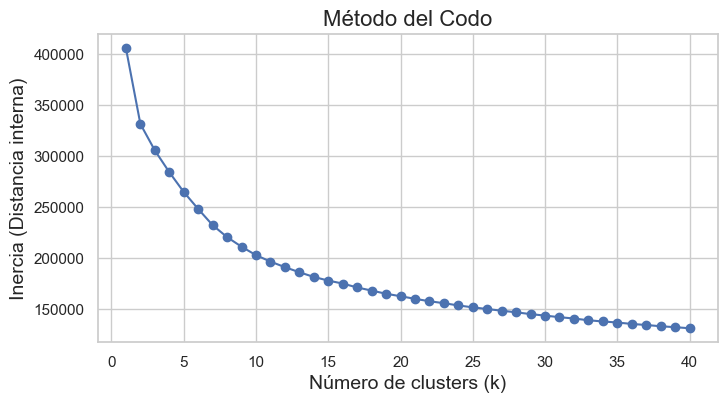

In [11]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=40, init='k-means++')
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# 3. Graficar la curva del codo
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inercia (Distancia interna)", fontsize=14)
plt.title("Método del Codo", fontsize=16)
plt.grid(True)
plt.show()

In [12]:
silhouette_scores = []

for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
    

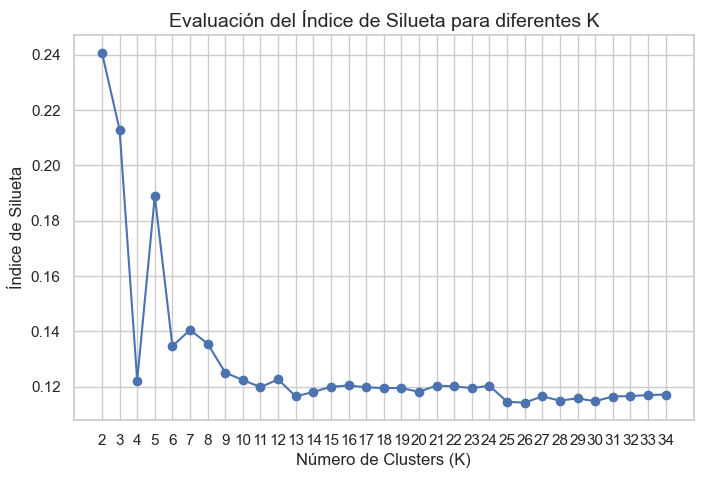

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 35), silhouette_scores, 'bo-')
plt.xlabel("Número de Clusters (K)", fontsize=12)
plt.ylabel("Índice de Silueta", fontsize=12)
plt.title("Evaluación del Índice de Silueta para diferentes K", fontsize=14)
plt.grid(True)
plt.xticks(range(2, 35))
plt.show()


In [15]:
kmeans_20 = KMeans(n_clusters=7, random_state=42, n_init=40, init='k-means++')
kmeans_20.fit(X_scaled)

# Obtener las etiquetas generadas
cluster_labels = kmeans_20.labels_

# Añadir las etiquetas al DataFrame original
music_info_clustered = music_info.copy()
music_info_clustered["cluster"] = cluster_labels

# Mostrar primeras filas para revisar
print(music_info_clustered[["track_id", "name", "artist", "cluster"]].head())

             track_id             name           artist  cluster
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers        2
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis        2
2  TROUVHL128F426C441  Come as You Are          Nirvana        2
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand        5
4  TRLNZBD128F935E4D8            Creep        Radiohead        5


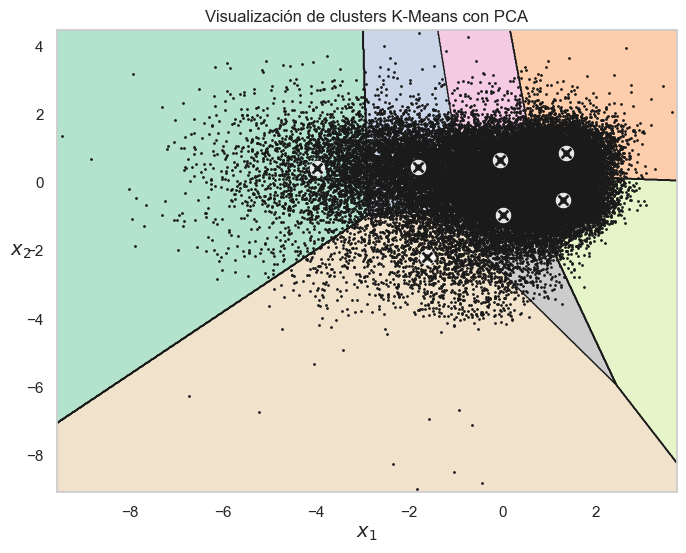

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

kmeans_pca = KMeans(n_clusters=7, random_state=42, n_init=40, init='k-means++')
kmeans_pca.fit(X_pca)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans_pca, X_pca)
plt.title("Visualización de clusters K-Means con PCA")
plt.show()

In [18]:
import numpy as np

y_semi = np.full(len(X_pca), -1)
num_etiquetas_por_cluster = 2
n_clusters = kmeans_pca.n_clusters

np.random.seed(42)
for cluster_id in range(n_clusters):
    indices_cluster = np.where(cluster_labels == cluster_id)[0]

    if len(indices_cluster) >= num_etiquetas_por_cluster:
        seleccionados = np.random.choice(indices_cluster, num_etiquetas_por_cluster, replace=False)
    else:
        seleccionados = indices_cluster 
    y_semi = np.full(len(X_scaled), -1)  # vector del mismo tamaño que X_scaled

    # luego sí puedes hacer
    y_semi[seleccionados] = cluster_id

    #y_semi[seleccionados] = cluster_id


In [22]:
from sklearn.model_selection import train_test_split

#X_train_pca, X_test_pca, y_train_semi, y_test_semi = train_test_split(X_pca, y_semi, test_size=0.2, random_state=42)

X_pca = pca.fit_transform(X_train)         # 40546 muestras
y_semi = np.full(len(X_train), -1)         # 40546 muestras

X_train_pca, X_test_pca, y_train_semi, y_test_semi = train_test_split(
    X_pca, y_semi, test_size=0.2, random_state=42
)

In [25]:
from sklearn.semi_supervised import LabelSpreading

#modelo_semi = LabelSpreading(kernel='knn', n_neighbors=40)
#modelo_semi.fit(X_pca, y_semi)





y_semi = np.full(len(X_pca), -1)

# Etiquetar un subconjunto pequeño, por ejemplo, 5% aleatorio
etiquetados = np.random.choice(len(X_pca), size=int(len(X_pca)*0.05), replace=False)
y_semi[etiquetados] = cluster_labels[etiquetados]

# Ahora sí entrenar
modelo_semi = LabelSpreading(kernel='knn', n_neighbors=40)
modelo_semi.fit(X_pca, y_semi)




y_final = modelo_semi.transduction_

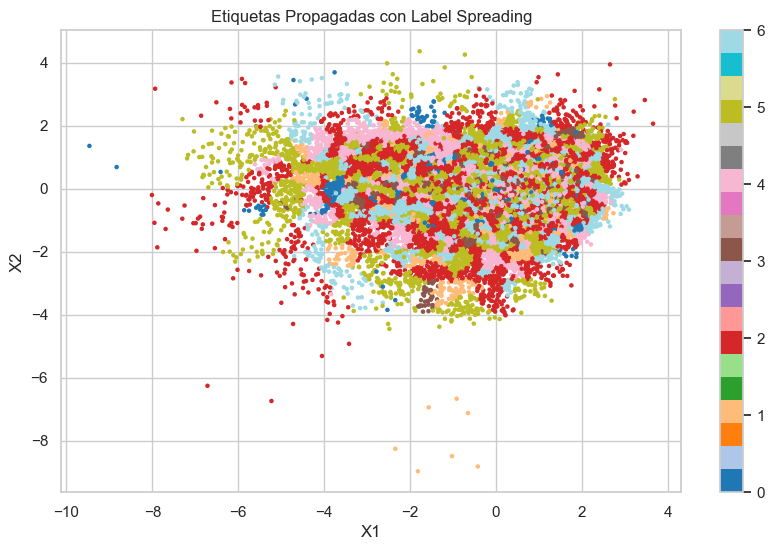

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_final, cmap='tab20', s=5)
plt.title("Etiquetas Propagadas con Label Spreading")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(scatter, ticks=range(n_clusters))
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression
import numpy as np
y_train_propagated = np.full(len(X_pca), -1) 
for i in range(len(np.unique(kmeans.labels_))):
    y_train_propagated[kmeans.labels_ == i] = y_final[i]

In [28]:
from sklearn.linear_model import LogisticRegression

X_subset = X_pca[:30000]
y_subset = y_train_propagated[:30000]

In [29]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg3.fit(X_subset, y_subset)

c:\Users\antra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)

In [32]:
X_train_pca, X_test_pca, y_train_semi, y_test_semi = train_test_split(
    X_pca, y_semi, test_size=0.2, random_state=42
)

score = modelo_semi.score(X_test_pca, y_test_semi)
print("Precisión del modelo semisupervisado:", score)

Precisión del modelo semisupervisado: 0.04032059186189889


In [56]:
idxs = np.argmin(kmeans_20, axis=0)
X_representative_digits = X_train[idxs]  # Sin .values
X_representative_digits = np.array(X_representative_digits)
X_representative_digits = X_representative_digits.reshape(1, -1)


In [57]:
y_representative_digits = y_train[idxs]
print(X_representative_digits.shape)  # Debería ser algo como (10, 64)


(1, 10)


In [58]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

ValueError: y should be a 1d array, got an array of shape () instead.

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [50]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Elegir al menos una muestra por cada clase
X_representative_digits = []
y_representative_digits = []

for class_label in np.unique(y):
    # Tomar la primera muestra de cada clase
    idx = np.where(y == class_label)[0][0]
    X_representative_digits.append(X[idx])
    y_representative_digits.append(y[idx])

X_representative_digits = np.array(X_representative_digits)
y_representative_digits = np.array(y_representative_digits)
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)


CPU times: total: 46.9 ms
Wall time: 88.5 ms


c:\Users\antra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: X has 10 features, but LogisticRegression is expecting 64 features as input.

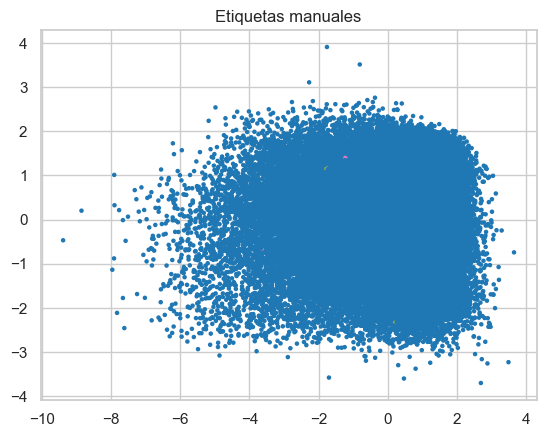

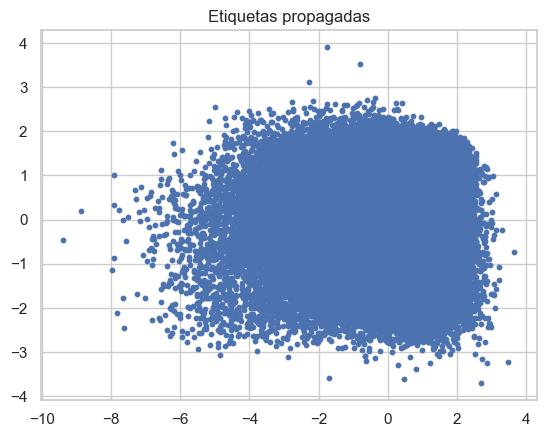

In [ ]:
import matplotlib.pyplot as plt

# Antes
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_semi, cmap="tab10", s=5)
plt.title("Etiquetas manuales")
plt.show()

# Después
modelo_semi.fit(X_train_pca, y_train_semi)
y_final = modelo_semi.transduction_
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.title("Etiquetas propagadas")
plt.show()